<a href="https://colab.research.google.com/github/YajaGen/Tiendas-Alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
# Crear una lista con los DataFrames individuales y los nombres de las tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda1", "Tienda2", "Tienda3", "Tienda4"]

# Calcular los ingresos totales por tienda
ingresos_por_tienda = [tienda["Precio"].sum() for tienda in tiendas]

# Mostrar ingresos calculados
for nombre, ingreso in zip(nombres, ingresos_por_tienda):
    print(f"{nombre}: ${ingreso:,} COP")

Tienda1: $1,150,880,400.0 COP
Tienda2: $1,116,343,500.0 COP
Tienda3: $1,098,019,600.0 COP
Tienda4: $1,038,375,700.0 COP


# 2. Ventas por categoría

In [17]:
# Crear una lista con los DataFrames individuales y los nombres de las tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda1", "Tienda2", "Tienda3", "Tienda4"]

# Calcular ingresos por categoría en cada tienda y ordenar de mayor a menor
ventas_por_categoria_tiendas = []
for idx, tienda in enumerate(tiendas):
    ingresos_por_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
    ventas_por_categoria_tiendas.append(ingresos_por_categoria)
    print(f"Ventas por categoría en {nombres[idx]}")
    # Mostrar los valores formateados como pesos colombianos
    for categoria, ingreso in ingresos_por_categoria.items():
        print(f"  - {categoria}: ${ingreso:,.0f} COP")
    print("-" * 50)


Ventas por categoría en Tienda1
  - Electrónicos: $409,476,100 COP
  - Electrodomésticos: $283,260,200 COP
  - Muebles: $192,528,900 COP
  - Instrumentos musicales: $75,102,400 COP
  - Deportes y diversión: $33,350,100 COP
  - Juguetes: $20,262,200 COP
  - Artículos para el hogar: $15,074,500 COP
  - Libros: $9,321,300 COP
--------------------------------------------------
Ventas por categoría en Tienda2
  - Electrónicos: $410,831,100 COP
  - Electrodomésticos: $348,567,800 COP
  - Muebles: $176,426,300 COP
  - Instrumentos musicales: $104,990,300 COP
  - Deportes y diversión: $34,744,500 COP
  - Juguetes: $15,945,400 COP
  - Artículos para el hogar: $14,746,900 COP
  - Libros: $10,091,200 COP
--------------------------------------------------
Ventas por categoría en Tienda3
  - Electrónicos: $410,775,800 COP
  - Electrodomésticos: $329,237,900 COP
  - Muebles: $201,072,100 COP
  - Instrumentos musicales: $77,380,900 COP
  - Deportes y diversión: $35,593,100 COP
  - Juguetes: $19,401,1

# 3. Calificación promedio de la tienda


In [25]:
# Crear una lista con los DataFrames individuales y los nombres de las tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda1", "Tienda2", "Tienda3", "Tienda4"]

# Cálculo detallado de la calificación promedio en porcentaje
calificaciones_promedio_porcentaje = []
for idx, tienda in enumerate(tiendas):
    suma_calificaciones = tienda["Calificación"].sum()
    total_calificaciones = tienda["Calificación"].count()
    calificacion_promedio = suma_calificaciones / total_calificaciones
    calificacion_porcentaje = calificacion_promedio * 20  # Conversión a porcentaje
    calificaciones_promedio_porcentaje.append(calificacion_porcentaje)
    # Mostrar cálculos paso a paso
    print(f"Cálculos para {nombres[idx]}:")
    print(f"  - Suma de calificaciones: {suma_calificaciones:.2f}")
    print(f"  - Total de calificaciones: {total_calificaciones}")
    print(f"  - Calificación promedio: {calificacion_promedio:.2f} ({calificacion_porcentaje:.2f}%)")
    print("-" * 50)

Cálculos para Tienda1:
  - Suma de calificaciones: 9422.00
  - Total de calificaciones: 2358
  - Calificación promedio: 4.00 (79.92%)
--------------------------------------------------
Cálculos para Tienda2:
  - Suma de calificaciones: 9524.00
  - Total de calificaciones: 2359
  - Calificación promedio: 4.04 (80.75%)
--------------------------------------------------
Cálculos para Tienda3:
  - Suma de calificaciones: 9550.00
  - Total de calificaciones: 2359
  - Calificación promedio: 4.05 (80.97%)
--------------------------------------------------
Cálculos para Tienda4:
  - Suma de calificaciones: 9422.00
  - Total de calificaciones: 2358
  - Calificación promedio: 4.00 (79.92%)
--------------------------------------------------


# 4. Productos más y menos vendidos




In [58]:
# Crear una lista con los DataFrames individuales y los nombres de las tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda1", "Tienda2", "Tienda3", "Tienda4"]

# Cálculo para cada tienda
for idx, tienda in enumerate(tiendas):
    ventas_productos = tienda.groupby("Producto")["Precio"].sum().sort_values(ascending=False)  # Agrupar por producto y sumar ingresos

    # Top 5 productos más vendidos
    top_5_mas_vendidos = ventas_productos.head(5)

    # Top 5 productos menos vendidos
    top_5_menos_vendidos = ventas_productos.tail(5)

    # Mostrar resultados para cada tienda
    print(f"Análisis para {nombres[idx]}:")
    print("  - Top 5 productos más vendidos:")
    for producto, ingreso in top_5_mas_vendidos.items():
        print(f"    {producto}: ${ingreso:,.2f} COP")
    print("  - Top 5 productos menos vendidos:")
    for producto, ingreso in top_5_menos_vendidos.items():
        print(f"    {producto}: ${ingreso:,.2f} COP")
    print("-" * 50)

Análisis para Tienda1:
  - Top 5 productos más vendidos:
    Iphone 15: $96,697,500.00 COP
    TV LED UHD 4K: $90,295,300.00 COP
    Smart TV: $82,790,400.00 COP
    Refrigerador: $75,271,900.00 COP
    Tablet ABXY: $56,723,100.00 COP
  - Top 5 productos menos vendidos:
    Set de vasos: $1,471,800.00 COP
    Ajedrez de madera: $1,075,500.00 COP
    Dinosaurio Rex: $858,100.00 COP
    Cubo mágico 8x8: $748,400.00 COP
    Cuerda para saltar: $704,800.00 COP
--------------------------------------------------
Análisis para Tienda2:
  - Top 5 productos más vendidos:
    Iphone 15: $113,225,800.00 COP
    TV LED UHD 4K: $103,375,000.00 COP
    Refrigerador: $97,632,500.00 COP
    Lavadora de ropa: $66,762,300.00 COP
    Smart TV: $61,142,000.00 COP
  - Top 5 productos menos vendidos:
    Set de vasos: $1,542,600.00 COP
    Ajedrez de madera: $1,287,700.00 COP
    Cuerda para saltar: $856,900.00 COP
    Dinosaurio Rex: $770,300.00 COP
    Cubo mágico 8x8: $643,600.00 COP
--------------------

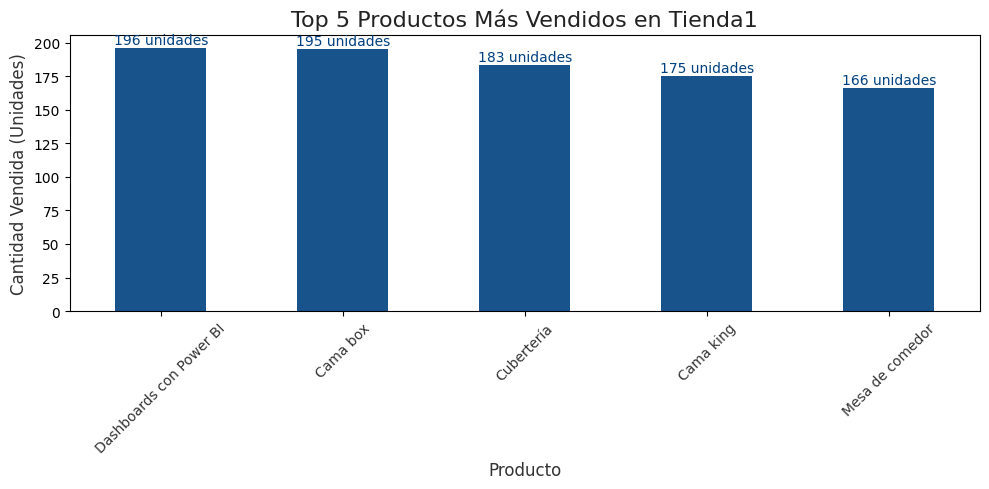

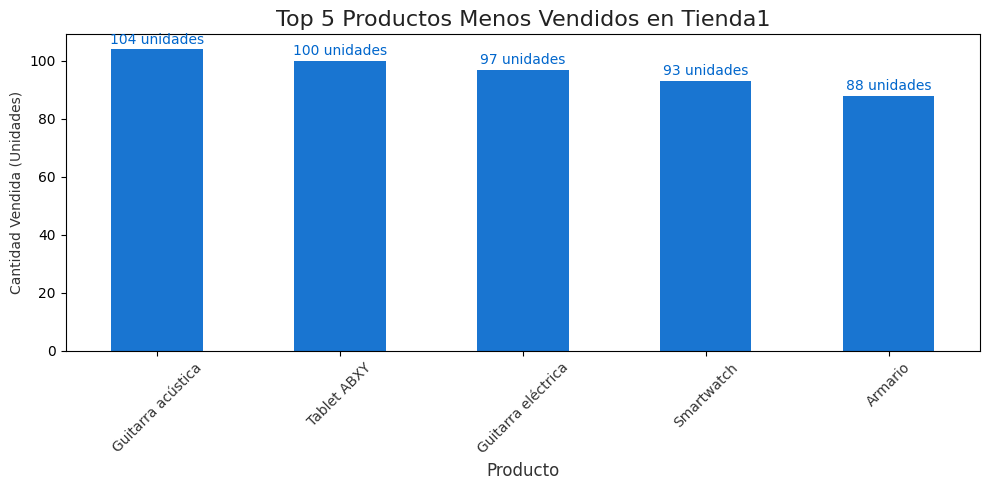

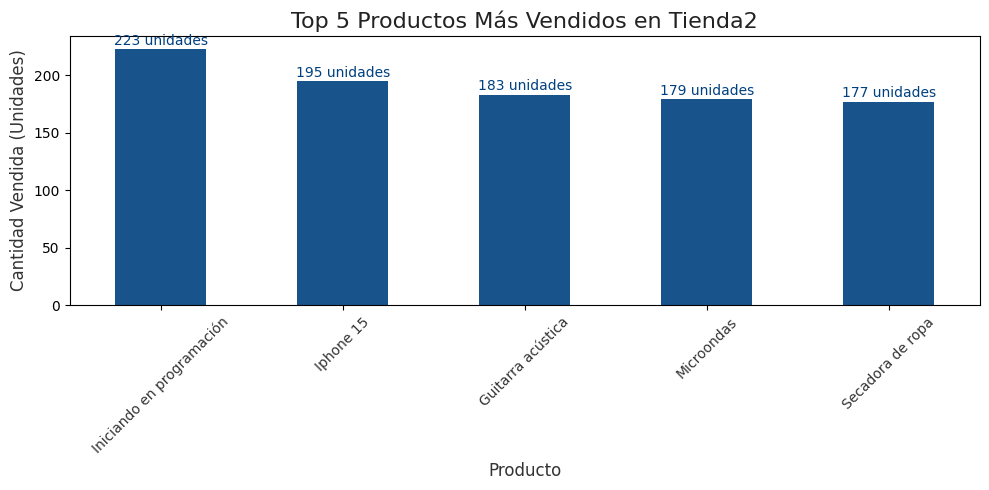

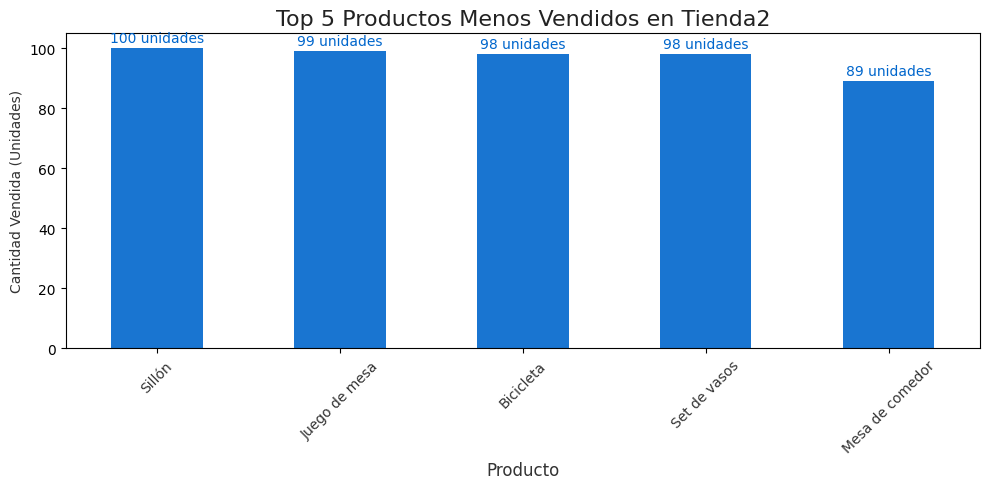

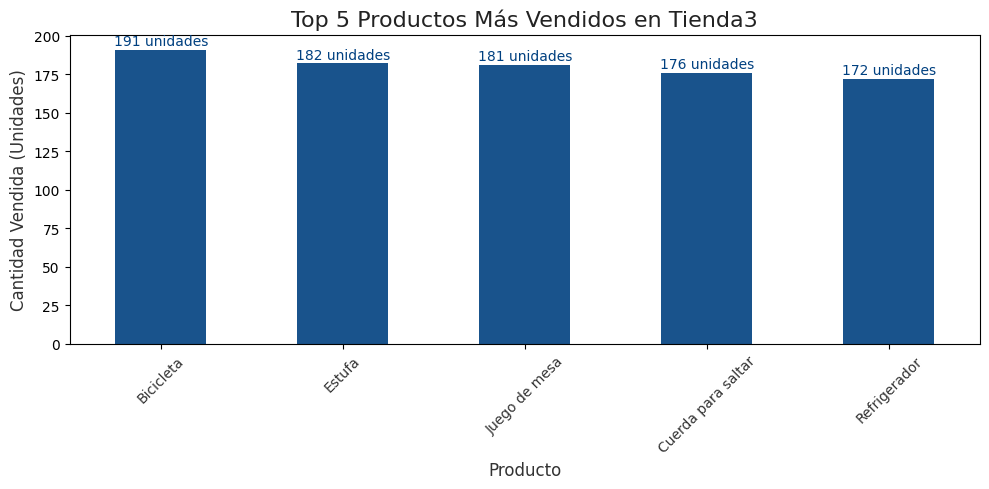

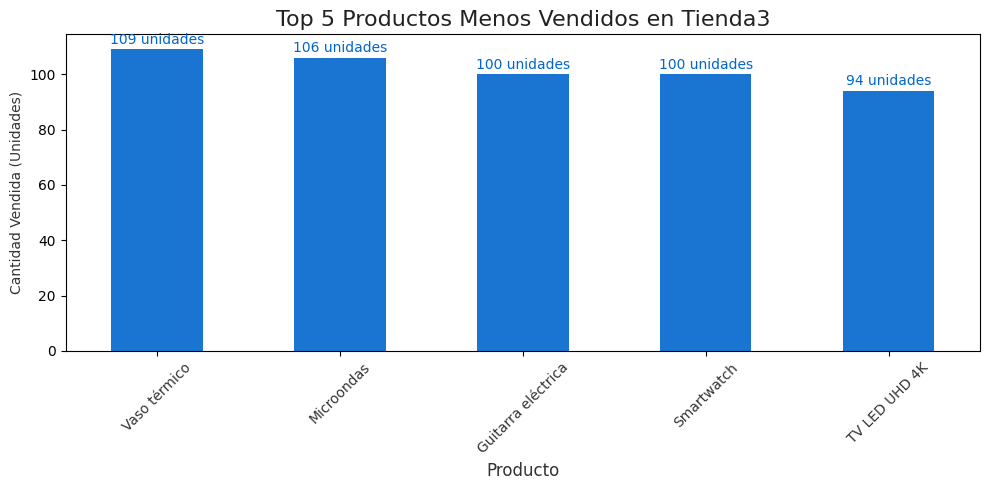

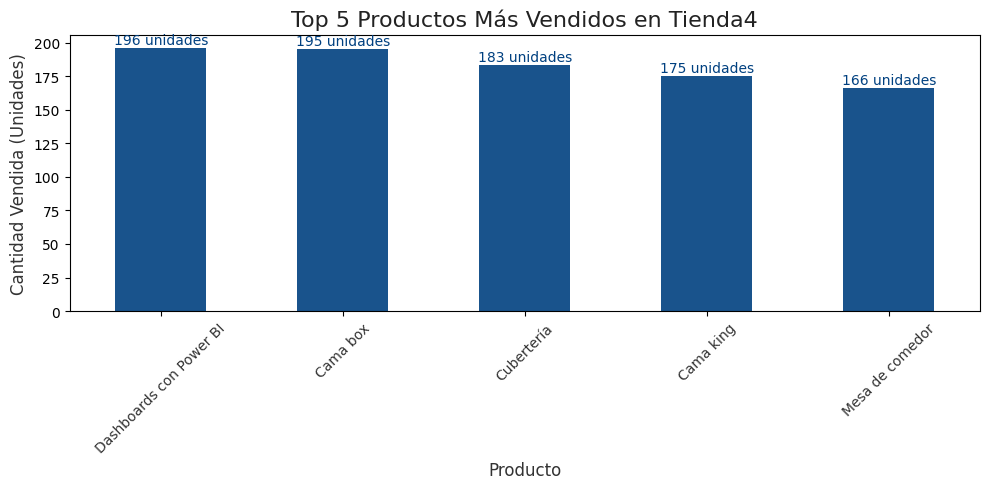

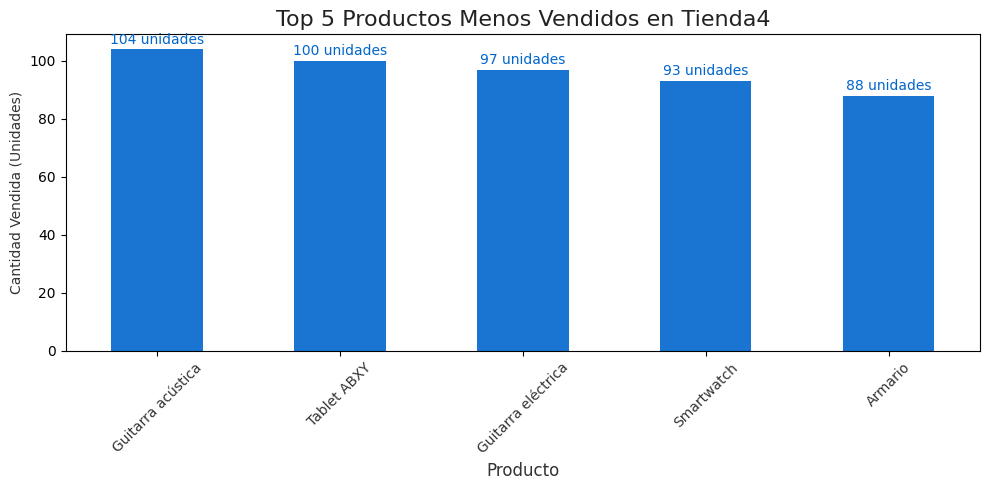

In [64]:
def grafico_top_productos_por_tienda(tienda, nombre_tienda, top=5):
    ventas_productos = tienda.groupby("Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

    # Colores corporativos
    color_mas_vendidos = "#004080"  # Azul oscuro para más vendidos
    color_menos_vendidos = "#0066CC"  # Azul claro para menos vendidos

    # Graficar los TOP más vendidos
    plt.figure(figsize=(10, 5))
    bars = ventas_productos.head(top).plot(kind="bar", color=color_mas_vendidos, alpha=0.9)
    plt.title(f"Top {top} Productos Más Vendidos en {nombre_tienda}", fontsize=16, color="#222222")
    plt.xlabel("Producto", fontsize=12, color="#333333")
    plt.ylabel("Cantidad Vendida (Unidades)", fontsize=12, color="#333333")
    plt.xticks(rotation=45, fontsize=10, color="#333333")

    # Añadir etiquetas de datos en las barras
    for bar in bars.containers[0]:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,  # Ajustar posición de etiquetas
            f"{bar.get_height():,.0f} unidades",
            ha="center", va="bottom", fontsize=10, color="#004080"
        )

    plt.tight_layout()
    plt.show()

    # Graficar los TOP menos vendidos
    plt.figure(figsize=(10, 5))
    bars = ventas_productos.tail(top).plot(kind="bar", color=color_menos_vendidos, alpha=0.9)
    plt.title(f"Top {top} Productos Menos Vendidos en {nombre_tienda}", fontsize=16, color="#222222")
    plt.xlabel("Producto", fontsize=12, color="#333333")
    plt.ylabel("Cantidad Vendida (Unidades)", fontsize=10, color="#333333")
    plt.xticks(rotation=45, fontsize=10, color="#333333")

    # Añadir etiquetas de datos en las barras
    for bar in bars.containers[0]:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,  # Ajustar posición de etiquetas
            f"{bar.get_height():,.0f} unidades",
            ha="center", va="bottom", fontsize=10, color="#0066CC"
        )

    plt.tight_layout()
    plt.show()

# Llamar a la función para cada tienda
for idx, tienda in enumerate(tiendas):
    grafico_top_productos_por_tienda(tienda, nombres[idx])

# 5. Envío promedio por tienda

In [50]:
# Crear una lista con los DataFrames individuales y los nombres de las tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda1", "Tienda2", "Tienda3", "Tienda4"]

# Cálculo detallado del envío promedio para cada tienda
envios_promedio = []
for idx, tienda in enumerate(tiendas):
    suma_envios = tienda["Costo de envío"].sum()  # Uso del nombre correcto de la columna
    total_envios = tienda["Costo de envío"].count()
    envio_promedio = suma_envios / total_envios
    envios_promedio.append(envio_promedio)
    # Mostrar cálculos paso a paso
    print(f"Cálculos para {nombres[idx]}:")
    print(f"  - Suma de costos de envío: ${suma_envios:,.2f} COP")
    print(f"  - Total de envíos: {total_envios}")
    print(f"  - Envío promedio: ${envio_promedio:,.2f} COP")
    print("-" * 50)

Cálculos para Tienda1:
  - Suma de costos de envío: $55,317,400.00 COP
  - Total de envíos: 2358
  - Envío promedio: $23,459.46 COP
--------------------------------------------------
Cálculos para Tienda2:
  - Suma de costos de envío: $59,485,100.00 COP
  - Total de envíos: 2359
  - Envío promedio: $25,216.24 COP
--------------------------------------------------
Cálculos para Tienda3:
  - Suma de costos de envío: $58,516,600.00 COP
  - Total de envíos: 2359
  - Envío promedio: $24,805.68 COP
--------------------------------------------------
Cálculos para Tienda4:
  - Suma de costos de envío: $55,317,400.00 COP
  - Total de envíos: 2358
  - Envío promedio: $23,459.46 COP
--------------------------------------------------


## **Dashboard**

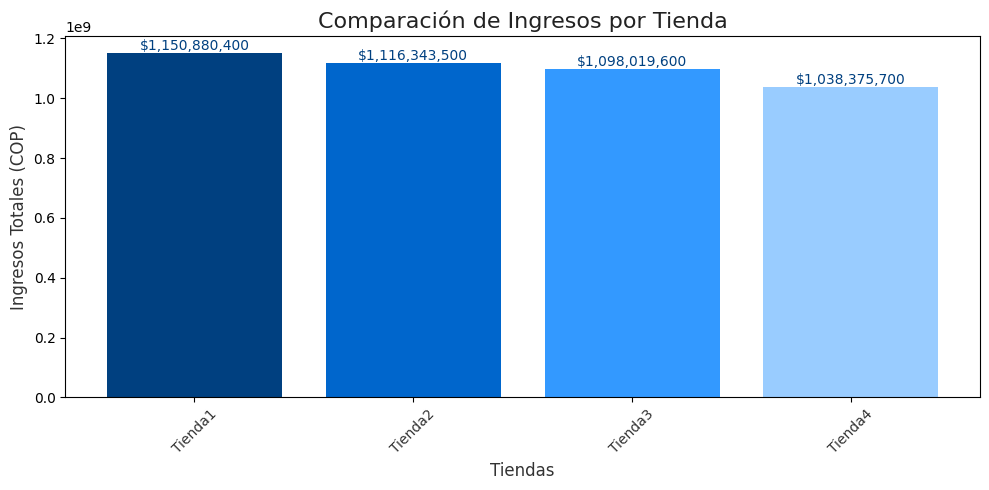

In [51]:
import matplotlib.pyplot as plt

def grafico_ingresos_corporativo(nombres, ingresos):
    plt.figure(figsize=(10, 5))

    colores_corporativos = ["#004080", "#0066CC", "#3399FF", "#99CCFF"]

    bars = plt.bar(nombres, ingresos, color=colores_corporativos)

    # Etiquetas y estilo del gráfico
    plt.xlabel("Tiendas", fontsize=12, color="#333333")  # Ajusta colores y fuentes
    plt.ylabel("Ingresos Totales (COP)", fontsize=12, color="#333333")
    plt.title("Comparación de Ingresos por Tienda", fontsize=16, color="#222222")
    plt.xticks(rotation=45, fontsize=10, color="#333333")

    # Añadir etiquetas en las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1000,
            f"${int(height):,}",
            ha='center', va='bottom', fontsize=10, color="#004080"
        )

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

# Llamar a la función con los datos
grafico_ingresos_corporativo(nombres, ingresos_por_tienda)


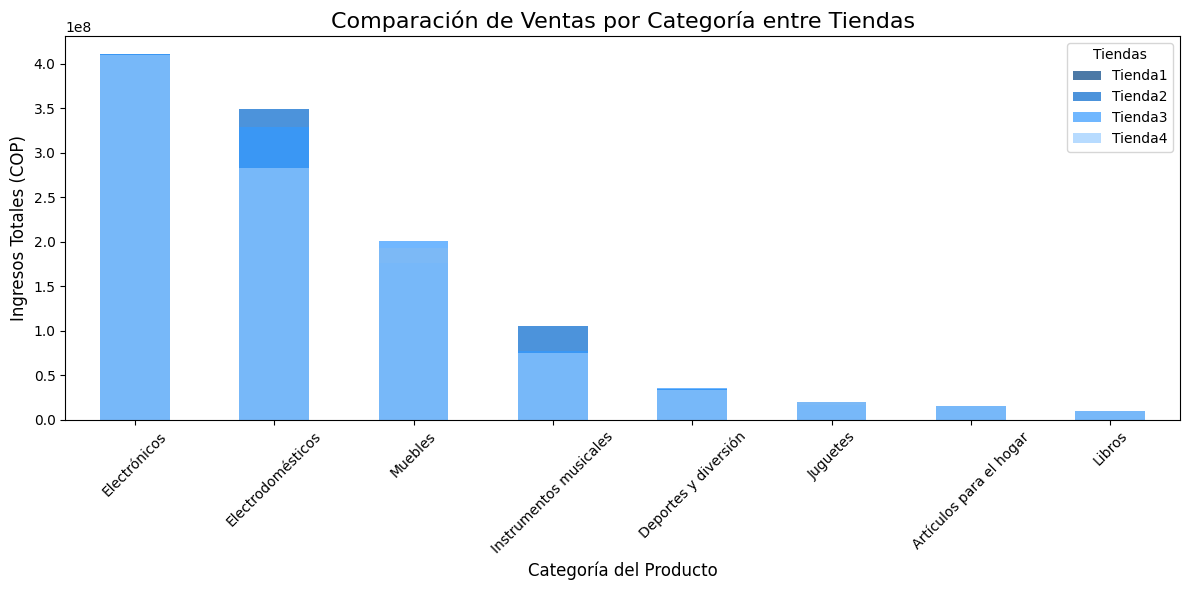

In [52]:
import matplotlib.pyplot as plt

def grafico_ventas_por_categoria_combinado(ventas_por_categoria_tiendas, nombres):
    plt.figure(figsize=(12, 6))

    # Colores corporativos (puedes adaptarlos)
    colores_categorias = ["#004080", "#0066CC", "#3399FF", "#99CCFF"]

    # Dibujar un gráfico de barras agrupadas para cada tienda
    for idx, ingresos_por_categoria in enumerate(ventas_por_categoria_tiendas):
        ingresos_por_categoria.plot(
            kind="bar", alpha=0.7, color=colores_categorias[idx % len(colores_categorias)],
            label=nombres[idx]
        )

    plt.title("Comparación de Ventas por Categoría entre Tiendas", fontsize=16)
    plt.xlabel("Categoría del Producto", fontsize=12)
    plt.ylabel("Ingresos Totales (COP)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title="Tiendas", fontsize=10)
    plt.tight_layout()
    plt.show()

# Generar el gráfico combinando todas las tiendas
grafico_ventas_por_categoria_combinado(ventas_por_categoria_tiendas, nombres)

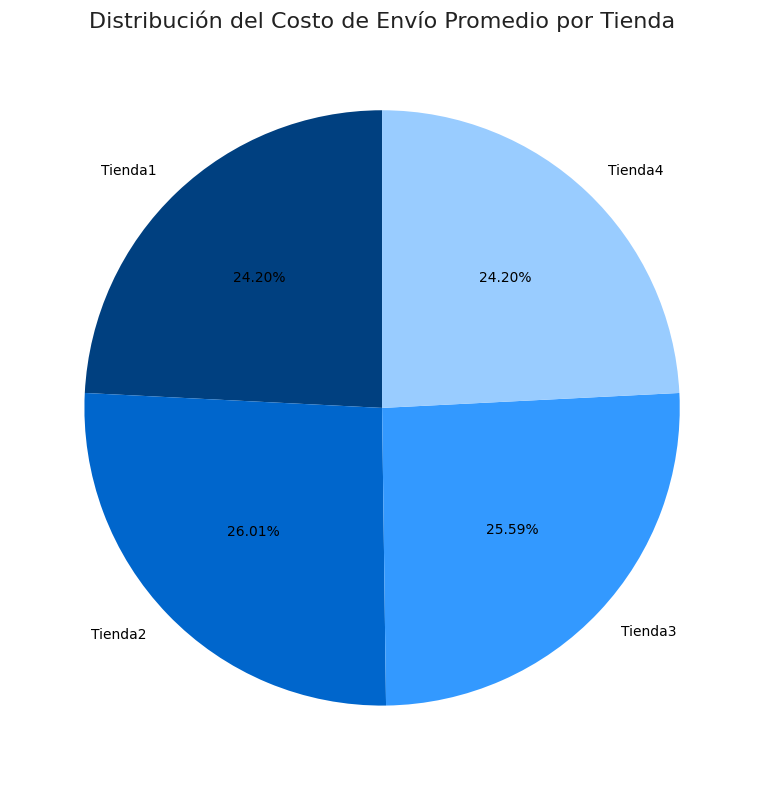

In [53]:
def grafico_circular_envios_promedio(nombres, envios_promedio):
    plt.figure(figsize=(8, 8))

    # Crear gráfico circular
    plt.pie(
        envios_promedio, labels=nombres, autopct='%1.2f%%',
        startangle=90, colors=["#004080", "#0066CC", "#3399FF", "#99CCFF"]
    )

    # Título
    plt.title("Distribución del Costo de Envío Promedio por Tienda", fontsize=16, color="#222222")
    plt.tight_layout()
    plt.show()

# Generar el gráfico
grafico_circular_envios_promedio(nombres, envios_promedio)